# Problem 1: Analyzing vehicle and pedestrian stops from law enforcement departments across Rhode Island

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/police_ri.csv'
ri = pd.read_csv(url, parse_dates={'stop_datetime': ['stop_date','stop_time']})

The 'ri' DataFrame contains data on vehicle and pedestrian stops from law enforcement departments across the state of Rhode Island.
This dataset has been obtained from the [Standford Open Police Project](https://openpolicing.stanford.edu/).

In [3]:
ri.head()

,stop_datetime,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


**Part 1:** Remove the column that only contains missing values

In [5]:
ri.drop('county_name', axis=1, inplace=True)

**Part 2:** Do men or women speed more often?

In [22]:
numberMen = len(ri.loc[(ri.violation == 'Speeding') & (ri.driver_gender == 'M')])
numberWomen = len(ri.loc[(ri.violation == 'Speeding') & (ri.driver_gender == 'F')])

print('men speeding:', numberMen)
print('women speeding:', numberWomen)
print('# of more men speeding than women:', numberMen - numberWomen)

men speeding: 32979
women speeding: 15482
# of more men speeding than women: 17497


**Part 3:** Does gender affect who gets searched during a stop?

In [28]:
numberMen = len(ri.loc[(ri.search_conducted) & (ri.driver_gender == 'M')])
numberWomen = len(ri.loc[(ri.search_conducted) & (ri.driver_gender == 'F')])
print('men searched:', numberMen)
print('women searched:', numberWomen)
print('# of more men searched:', numberMen - numberWomen)

men searched: 2725
women searched: 471


**Part 4:** Why is search_type missing so often?

In [ ]:
# search_type is NAN when no search is conducted

**Part 5:** During a search, how often is the driver frisked?

In [48]:
friskCount = ri.search_type.str.contains('Frisk').sum()
searchCount = ri.search_conducted.sum()
print('Frisk rate:', (friskCount / searchCount))

Frisk rate: 0.08573216520650813


**Part 6:**  Which year had the least number of stops?

In [84]:
ri.stop_datetime.dt.year.value_counts().tail(1)

2005    2558
Name: stop_datetime, dtype: int64

**Part 7:** How does drug activity change by time of day?

Text(0.5, 1.0, 'drug related stops through time of day')

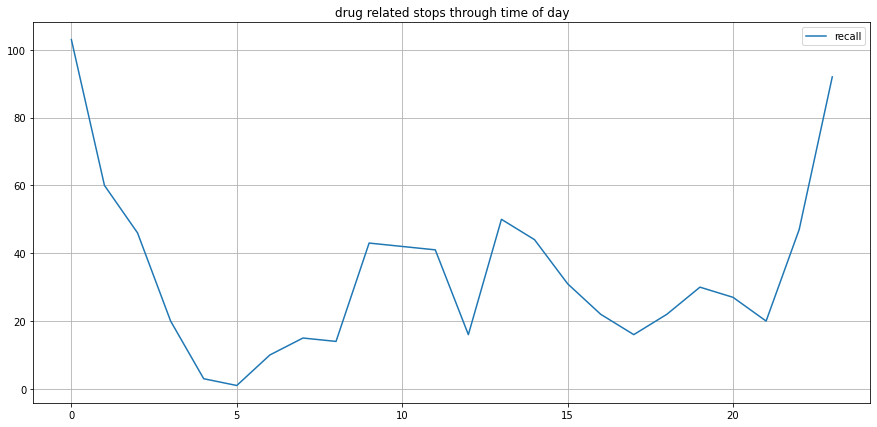

In [105]:
# ri.stop_datetime.dt.hour
hourlySearchCounts = ri.loc[ri.drugs_related_stop].groupby('stop_datetime').drugs_related_stop.sum()

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(hourlySearchCounts, label='drug related stops')
ax.legend()
ax.grid(True)
ax.set_title('drug related stops through time of day')

**Part 8:** Do most stops occur at night?

Text(0.5, 1.0, 'stops through time of day')

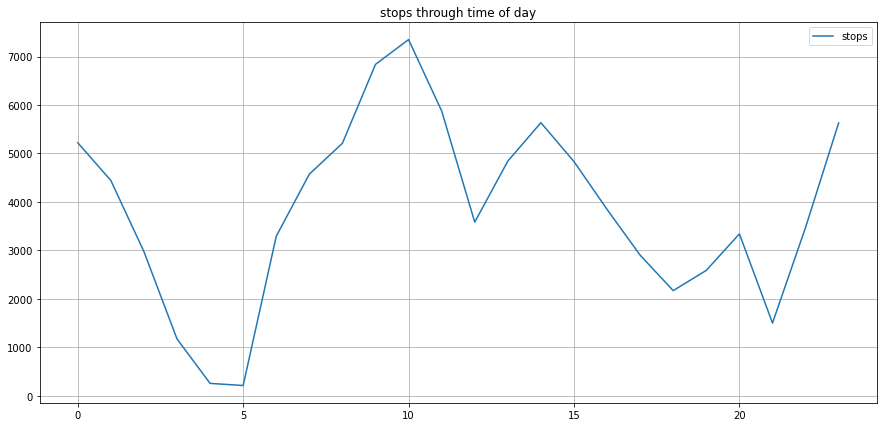

In [131]:
# ri.stop_datetime.dt.hour

hourlySearchCounts = ri.stop_datetime.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(hourlySearchCounts, label='stops')
ax.legend()
ax.grid(True)
ax.set_title('stops through time of day')



**Part 9:** Find the bad data in the stop_duration column and fix it

In [139]:
ri['stop_datetime'] = ri['stop_datetime'].fillna(0) # not sure how to do this D:

**Part 10:** What is the mean stop_duration for each violation_raw?

In [149]:
ri.groupby('violation_raw').stop_duration.sum()

violation_raw
APB                                 0-15 Min30+ Min0-15 Min30+ Min30+ Min30+ Min0-...
Call for Service                    16-30 Min30+ Min16-30 Min0-15 Min16-30 Min30+ ...
Equipment/Inspection Violation      0-15 Min0-15 Min0-15 Min16-30 Min30+ Min0-15 M...
Motorist Assist/Courtesy            0-15 Min0-15 Min0-15 Min0-15 Min0-15 Min0-15 M...
Other Traffic Violation             0-15 Min30+ Min16-30 Min30+ Min0-15 Min30+ Min...
Registration Violation              0-15 Min16-30 Min16-30 Min0-15 Min0-15 Min16-3...
Seatbelt Violation                  0-15 Min0-15 Min0-15 Min0-15 Min0-15 Min0-15 M...
Special Detail/Directed Patrol      30+ Min30+ Min30+ Min30+ Min30+ Min0-15 Min30+...
Speeding                            0-15 Min0-15 Min0-15 Min0-15 Min0-15 Min0-15 M...
Suspicious Person                   16-30 Min0-15 Min0-15 Min0-15 Min0-15 Min0-15 ...
Violation of City/Town Ordinance    0-15 Min0-15 Min16-30 Min0-15 Min16-30 Min30+ ...
Warrant                             0-15

**EXTRA:** Compare the age distributions for each violation